# Importation du dataset

In [262]:
import pandas as pd

path = "./Datasets/"
general_data = pd.read_csv(path +"general_data.csv")

general_data.head()

,Attrition,BusinessTravel,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,AttendanceScore
0,0.0,1.0,1.0,1,0,0,3.0,4.0,442.419037
1,1.0,2.0,6.0,5,1,4,3.0,2.0,463.138136
2,0.0,2.0,5.0,5,0,3,2.0,2.0,420.794421
3,0.0,0.0,13.0,8,7,5,4.0,4.0,431.620709
4,0.0,1.0,9.0,6,0,4,4.0,1.0,480.370476


# Jeu de test et d'entrainement

In [263]:
# Split the data into a training and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(general_data.drop("Attrition", axis=1), general_data.Attrition, test_size=0.33, random_state=42)

In [264]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve

def test_model(y_train, y_train_pred, y_scores):
    confusion_matrix_score = confusion_matrix(y_train, y_train_pred)
    print("Confusion matrix :\n", confusion_matrix_score)

    precision = precision_score(y_train, y_train_pred)
    print("Precision :", precision)

    recall = recall_score(y_train, y_train_pred)
    print("Recall :", recall)

    f1 = f1_score(y_train, y_train_pred)
    print("F1_score :", f1)

    accuracy = accuracy_score(y_train, y_train_pred)
    print("Accuracy :", accuracy)

    roc_auc = roc_auc_score(y_train, y_scores)
    print("AUC :", roc_auc)
    
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

    plt.figure(figsize=(8, 4))
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_train, y_scores)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=None)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.show()


# Descente de gradient

Confusion matrix :
 [[2472    0]
 [ 476    6]]
Precision : 1.0
Recall : 0.012448132780082987
F1_score : 0.02459016393442623
Accuracy : 0.8388625592417062
AUC : 0.6855033638158161


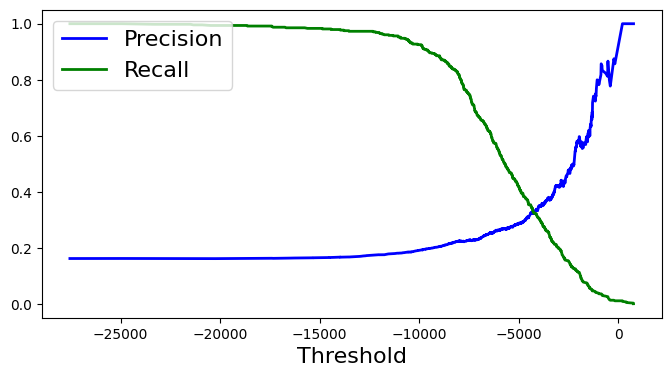

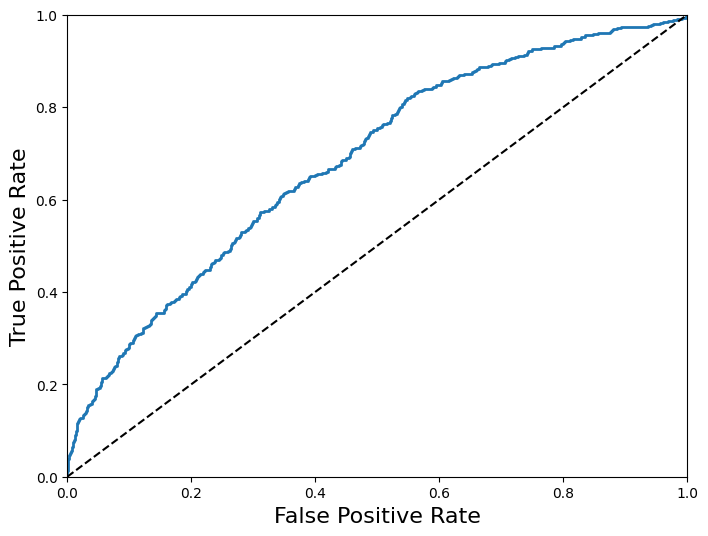

In [265]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

sgd_clf = SGDClassifier(max_iter=500, random_state=42)

# Evaluation du modèle
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

test_model(y_train, y_train_pred, y_scores)

# Random forest classifier

Confusion matrix :
 [[2437   35]
 [ 152  330]]
Precision : 0.9041095890410958
Recall : 0.6846473029045643
F1_score : 0.7792207792207793
Accuracy : 0.9366960054163845
AUC : 0.945010255945427


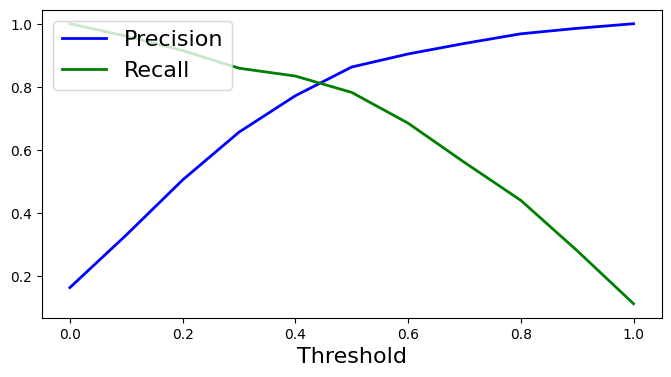

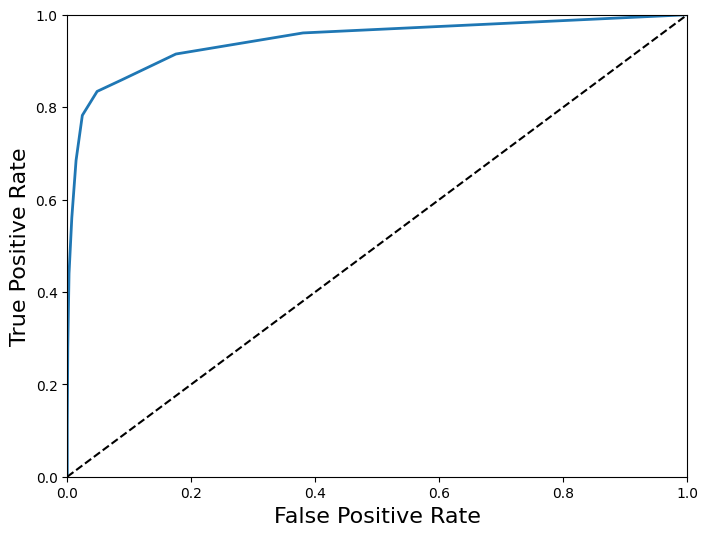

In [266]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

# Evaluation du modèle
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

test_model(y_train, y_train_pred, y_scores)

# Régression logistique

Confusion matrix :
 [[2441   31]
 [ 421   61]]
Precision : 0.6630434782608695
Recall : 0.12655601659751037
F1_score : 0.21254355400696864
Accuracy : 0.8469871360866622
AUC : 0.767280680551639


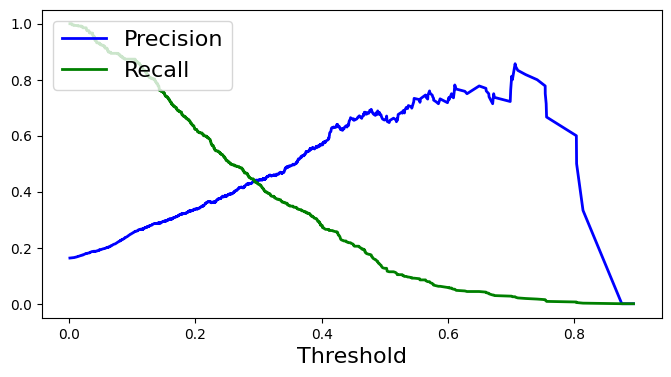

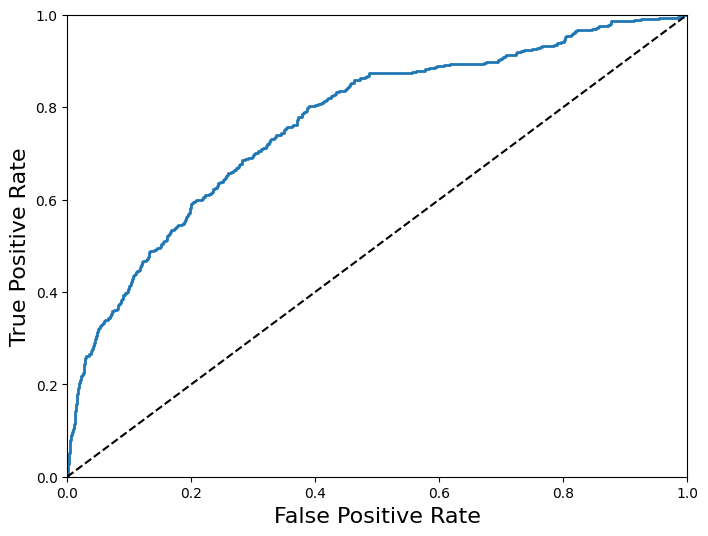

In [267]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Evaluation du modèle
y_train_pred = cross_val_predict(logistic_regression, X_train, y_train, cv=3)

y_scores = cross_val_predict(logistic_regression, X_train, y_train, cv=3, method="predict_proba")[:, 1]

test_model(y_train, y_train_pred, y_scores)

# Perceptron

Confusion matrix :
 [[1465 1007]
 [ 193  289]]
Precision : 0.22299382716049382
Recall : 0.5995850622406639
F1_score : 0.3250843644544432
Accuracy : 0.5937711577522004
AUC : 0.6091712658958761


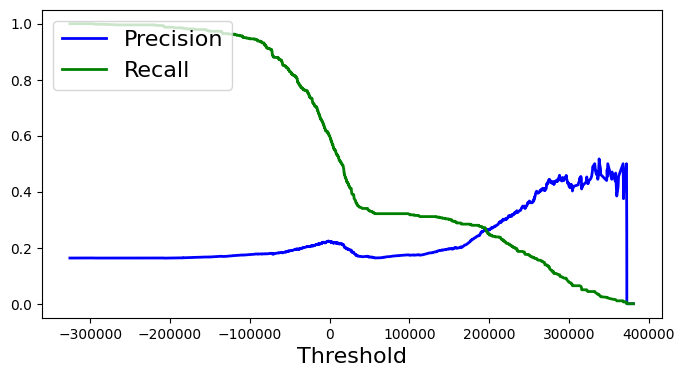

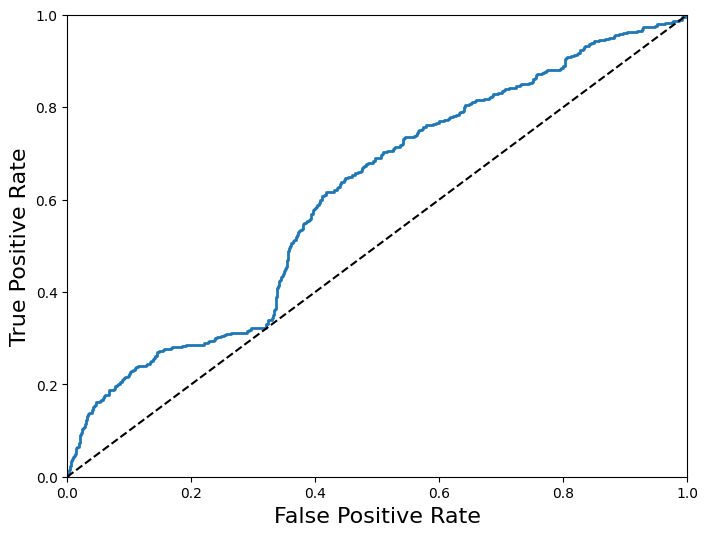

In [268]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(random_state=42)

# Evaluation du modèle
y_train_pred = cross_val_predict(perceptron, X_train, y_train, cv=3)

y_scores = cross_val_predict(perceptron, X_train, y_train, cv=3, method="decision_function")

test_model(y_train, y_train_pred, y_scores)

# Voting classifier

Confusion matrix :
 [[2449   23]
 [ 265  217]]
Precision : 0.9041666666666667
Recall : 0.45020746887966806
F1_score : 0.6011080332409973
Accuracy : 0.9025050778605281
AUC : 0.9431474841880513


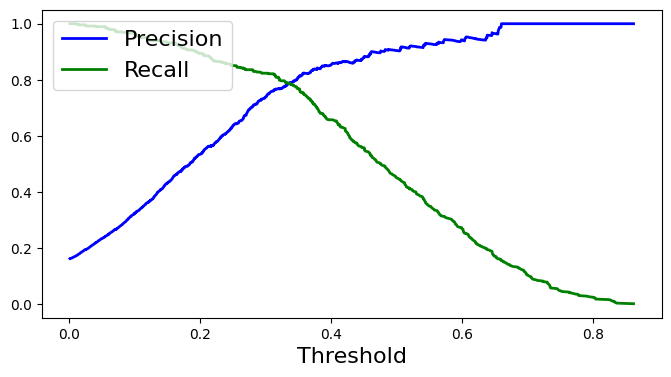

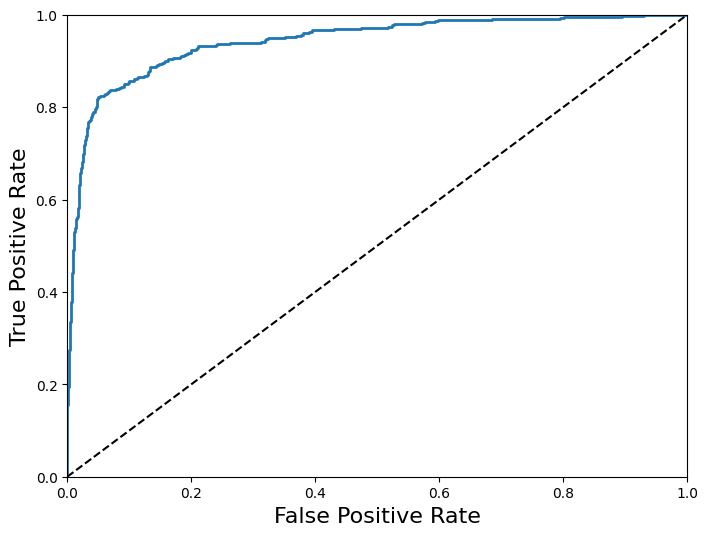

In [269]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
voting_forest = RandomForestClassifier(random_state=42, n_estimators=10)
voting_logistic = LogisticRegression(max_iter=1000, random_state=42)

voting_clf = VotingClassifier(estimators=[('rf', voting_forest), ('lr', voting_logistic)], voting='soft')

# Evaluation du modèle
y_train_pred = cross_val_predict(voting_clf, X_train, y_train, cv=3)

y_scores = cross_val_predict(voting_clf, X_train, y_train, cv=3, method="predict_proba")[:, 1]

test_model(y_train, y_train_pred, y_scores)

# Hyperparamètres

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Supposons que X_train, X_test, y_train, y_test soient déjà définis

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons requis à chaque feuille
    'bootstrap': [True, False]        # Méthode d'échantillonnage des ensembles de données
}

# Création du modèle de base à tuner
rf = RandomForestClassifier(random_state=42)

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustement du modèle GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage de la meilleure combinaison d'hyperparamètres
print(f'Meilleurs hyperparamètres: {grid_search.best_params_}')

# Entraînement du modèle avec la meilleure combinaison d'hyperparamètres
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matrice de confusion:')
print(cm)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs hyperparamètres: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.97
Matrice de confusion:
[[1218    9]
 [  30  199]]


# Threshold

In [271]:
# application du threshold dans le modèle 

# Sélection du seuil
threshold = 0.355

# Prédiction des probabilités
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Prédiction des classes
y_pred = (y_pred_proba >= threshold).astype(int)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
print('Matrice de confusion:')
print(cm)

# Calcul de la précision
precision = precision_score(y_test, y_pred)
print(f'Précision: {precision:.2f}')

# Calcul du rappel
recall = recall_score(y_test, y_pred)
print(f'Rappel: {recall:.2f}')

# Calcul du F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {roc_auc:.2f}')

Matrice de confusion:
[[1205   22]
 [  28  201]]
Précision: 0.90
Rappel: 0.88
F1-score: 0.89
AUC: 0.98
